In [ ]:
# import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx.algorithms.community as nx_comm
import pandas as pd
import itertools

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read graph data from file
with open('/content/com-youtube.ungraph.txt', 'r') as f:
    G = nx.read_edgelist(f)

In [ ]:
# sort nodes by degree in ascending order, degree = primary key & node ID = secondary key
nodes_sorted_by_degree = sorted(G.degree, key=lambda x: (-x[1], x[0]))

# extract top 5000 nodes with highest degree
high_degree_nodes = [node for node, degree in nodes_sorted_by_degree[:5000]]

# create subgraph from high_degree_nodes
G_subgraph = G.subgraph(high_degree_nodes)

# sort edges starting with min node ID
edges_sorted = sorted(G_subgraph.edges(), key=lambda edge: (min(edge), max(edge)))

# random seed for reproducibility
random.seed(42)

#random sample 15,000 edges from edges_sorted
sampled_edges = random.sample(edges_sorted, min(15000, len(edges_sorted)))

# collect the nodes in the sampled_edges
sampled_nodes = set()
for (i,j) in sampled_edges:
  sampled_nodes.add(i)
  sampled_nodes.add(j)

In [ ]:
# create graph with sampled nodes and edges
G_sampled = nx.Graph()
G_sampled.add_nodes_from(list(sampled_nodes))
G_sampled.add_edges_from(sampled_edges)

In [ ]:
# print graph statistics
print(f'Number of Nodes: {G_sampled.number_of_nodes()}')
print(f'Number of Edges: {G_sampled.number_of_edges()}')
print(f'Average Degree: {2 * G_sampled.number_of_edges() / G_sampled.number_of_nodes()}')
print(f'Clustering Coefficient: {nx.average_clustering(G_sampled)}')
print(f'Is Graph Connected: {nx.is_connected(G_sampled)}')

Number of Nodes: 4568
Number of Edges: 15000
Average Degree: 6.567425569176883
Clustering Coefficient: 0.015436066577593286
Is Graph Connected: False


In [ ]:
# find and display bridges and articulations points
bridges = nx.bridges(G_sampled)
articulation_pts = nx.articulation_points(G_sampled)

# get list of bridges and articulation points
bridges_list = list(bridges)
articulation_points_list = list(articulation_pts)

# print bridge and articulation info
print("Number of Bridges:", len(bridges_list))
print("Number of Articulation Points:", len(articulation_points_list))
print("Bridges:", bridges_list)
print("Articulation Points:", articulation_points_list)

Number of Bridges: 577
Number of Articulation Points: 469
Bridges: [('670481', '764980'), ('28149', '137767'), ('126134', '27110'), ('2195', '17928'), ('23473', '678573'), ('20488', '69321'), ('122760', '179122'), ('70819', '210'), ('97261', '2626'), ('99485', '24062'), ('100931', '20458'), ('13738', '708871'), ('587115', '664490'), ('2709', '122826'), ('23632', '37141'), ('112198', '20049'), ('1013', '67439'), ('6903', '336'), ('29665', '30670'), ('88986', '77717'), ('8875', '162036'), ('36548', '95826'), ('36548', '18245'), ('14416', '22706'), ('663641', '1105740'), ('37248', '53320'), ('181088', '21208'), ('6332', '214320'), ('6332', '168058'), ('6332', '1048147'), ('4011', '34'), ('5926', '6456'), ('111390', '2486'), ('92975', '57432'), ('27977', '37202'), ('354218', '160752'), ('15709', '4956'), ('25592', '266506'), ('104539', '1064471'), ('4394', '130975'), ('4394', '17300'), ('88940', '24804'), ('101722', '124024'), ('122801', '622420'), ('20335', '20903'), ('81945', '26851'), (

In [ ]:
# calculate diameters of connected components & print largest connected component
components = list(nx.connected_components(G_sampled))
diameter = []
for component in components:
    G_component = G_sampled.subgraph(component)
    diameter.append(nx.diameter(G_component))
print(f'Maximum diameter of connected component: {max(diameter)}')

Maximum diameter of connected component: 14


(array([2.126e+03, 1.320e+03, 4.700e+02, 3.490e+02, 1.370e+02, 4.900e+01,
        5.200e+01, 2.100e+01, 1.800e+01, 8.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([  1.  ,   4.66,   8.32,  11.98,  15.64,  19.3 ,  22.96,  26.62,
         30.28,  33.94,  37.6 ,  41.26,  44.92,  48.58,  52.24,  55.9 ,
         59.56,  63.22,  66.88,  70.54,  74.2 ,  77.86,  81.52,  85.18,
         88.84,  92.5 ,  96.16,  99.82, 103.48, 107.14, 110.8 , 114.46,
        118.12, 121.78, 125.44, 129.1 , 132.76, 136.42, 140.08, 143.74,
        147.4 , 

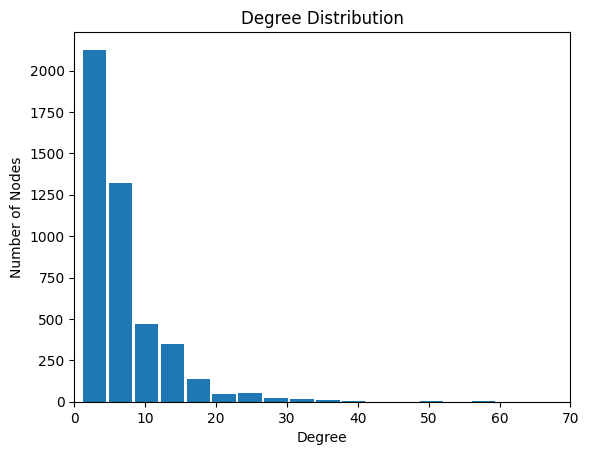

In [ ]:
# draw histogram for degree distribution
degrees = [G_sampled.degree(n) for n in G_sampled.nodes()]
# label x axis, y axis, and title
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.xlim(0, 70)
plt.hist(degrees, bins=50, rwidth=0.9)

In [ ]:
# calculate top 5 degree centrality values
G_degree = pd.Series(nx.degree_centrality(G_sampled))
print(G_degree.head())

6320      0.003065
670481    0.001533
116548    0.005036
28149     0.000657
24199     0.000438
dtype: float64


In [ ]:
# calculate top 5 loseness centrality values
G_closeness = pd.Series(nx.closeness_centrality(G_sampled))
print(G_closeness.head())

6320      0.248906
670481    0.232584
116548    0.267343
28149     0.217158
24199     0.254461
dtype: float64


In [ ]:
# calculate top 5 betweenness centrality values
G_betweenness = pd.Series(nx.betweenness_centrality(G_sampled, k=1000))
print(G_betweenness.head())

6320      0.001597
670481    0.001621
116548    0.007307
28149     0.000457
24199     0.000168
dtype: float64


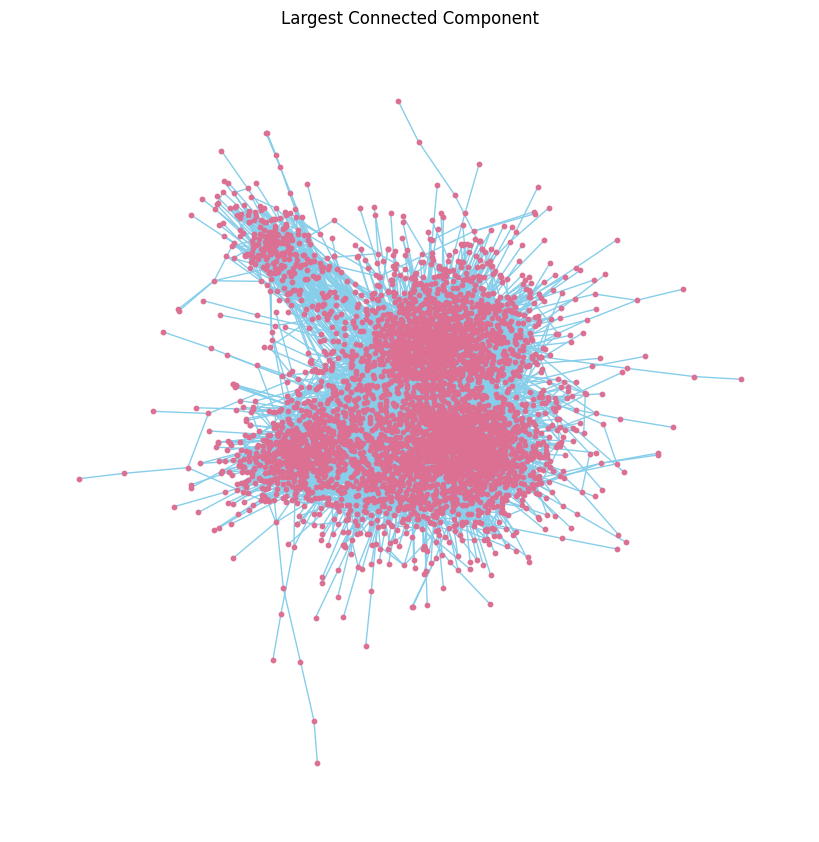

In [ ]:
# sort components by length in decreasing order
components = sorted(nx.connected_components(G_sampled), key=len, reverse=True)

# get the largest connected component
largest_component = G_sampled.subgraph(components[0])

# draw the largest connected component
plt.figure(figsize=(8, 8))

# spring layout for position
pos_largest = nx.spring_layout(largest_component)

#draw graph
nx.draw(
    largest_component,
    pos=pos_largest,
    node_size=10,
    edge_color="skyblue",
    with_labels=False,
    node_color="palevioletred"
)
# add title to graph
plt.title("Largest Connected Component")
plt.show()

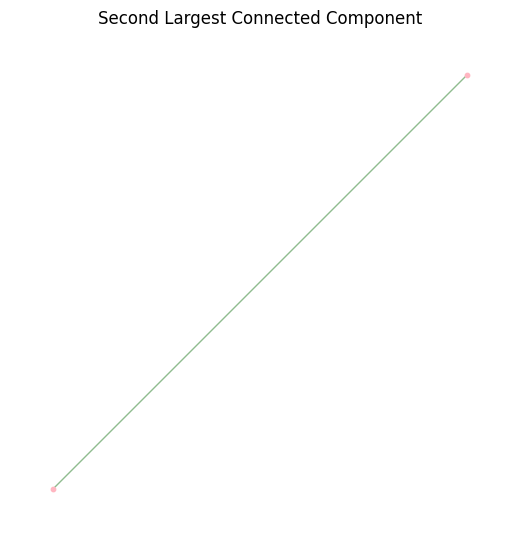

In [ ]:
# get the second largest connected component
second_largest_component = G_sampled.subgraph(components[1])

# plot the second largest connnected component
plt.figure(figsize=(5, 5))

# spring layout for position
pos_second_largest = nx.spring_layout(second_largest_component)

# draw graph
nx.draw(
    second_largest_component,
    pos=pos_second_largest,
    node_size=10,
    edge_color="darkseagreen",
    with_labels=False,
    node_color="lightpink"
)
# add title to graph
plt.title("Second Largest Connected Component")
plt.show()

In [ ]:
# function to assign community labels to nodes
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
          if v in G.nodes:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

# function to assign community labels to edges
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [ ]:
# function to generate colors for visualization
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [ ]:
# perform louvain algorithm
communities_l = nx_comm.louvain_communities(G_sampled, seed=123)

#returns communities and modularity score
print("# of communities: ", len(communities_l), ", modularity score: ", nx_comm.modularity(G_sampled, communities_l))

# of communities:  24 , modularity score:  0.6033237622222223


In [ ]:
# desired number of nodes for plot
num_sampled_nodes = 500

# sample a subset of nodes
sampled_nodes = random.sample(list(G_sampled.nodes), num_sampled_nodes)

# create a subgraph from sampled_nodes
G_sampled_small = G_sampled.subgraph(sampled_nodes)

# set node and edge communities
set_node_community(G_sampled_small, communities_l)
set_edge_community(G_sampled_small)

# set community color for nodes
node_color = [get_color(G_sampled_small.nodes[v]['community']) for v in G_sampled_small.nodes]

# set community color for internal edges
external = [(v, w) for v, w in G_sampled_small.edges if G_sampled_small.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_sampled_small.edges if G_sampled_small.edges[v, w]['community'] > 0]
internal_color = [get_color(G_sampled_small.edges[e]['community']) for e in internal]

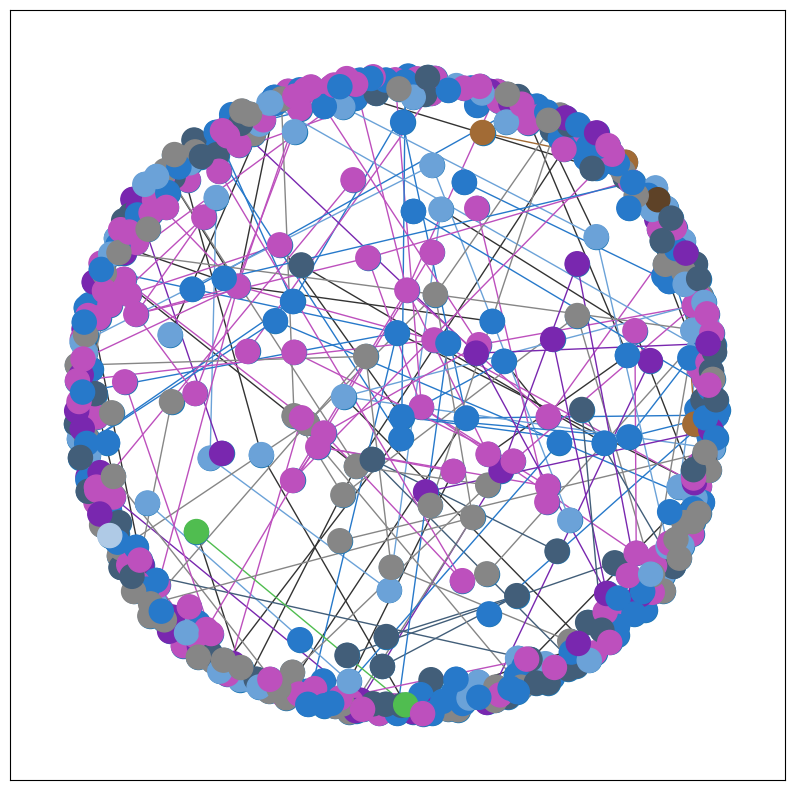

In [ ]:
# draw Louvain's communities
plt.figure(figsize=(10, 10))

# using spring layout for position
G_sampled_small_pos = nx.spring_layout(G_sampled_small, k=1.0, iterations=100)

# draw external edges
nx.draw_networkx(
    G_sampled_small,
    pos=G_sampled_small_pos,
    edgelist=external,
    edge_color="#333333",
    with_labels=False)

# draw nodes and internal edges
nx.draw_networkx(
    G_sampled_small,
    pos=G_sampled_small_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
    with_labels=False)

In [ ]:
# desired number of nodes in sample
num_sampled_nodes2 = 1250

# sample a subset of nodes
sampled_nodes2 = random.sample(list(G_sampled.nodes), num_sampled_nodes2)

# create a subgraph from sampled_nodes2
G_sampled_small2 = G_sampled.subgraph(sampled_nodes2)

# set node and edge communities
set_node_community(G_sampled_small2, communities_l)
set_edge_community(G_sampled_small2)

# set community color for nodes
node_color2 = [get_color(G_sampled_small2.nodes[v]['community']) for v in G_sampled_small2.nodes]

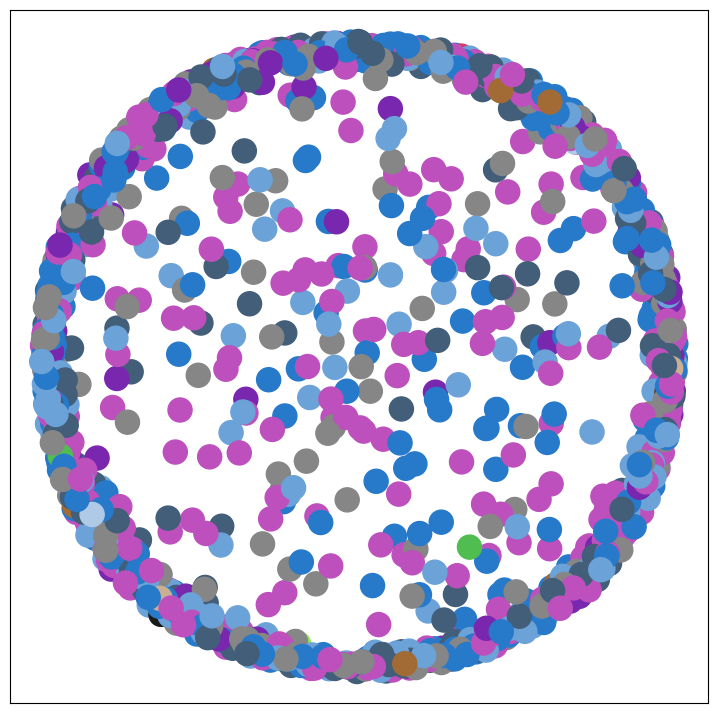

In [ ]:
# draw Louvain's communities
plt.figure(figsize=(9, 9))

# spring layout for position
G_sampled_small_pos2 = nx.spring_layout(G_sampled_small2, k=1.0, iterations=100)

# draw graph
nx.draw_networkx_nodes(
    G_sampled_small2,
    pos=G_sampled_small_pos2,
    node_color=node_color2
)

Size of the largest community: 1265
Nodes in the largest community: {'670481', '6424', '68176', '2195', '15764', '20166', '50318', '29589', '20177', '1418', '92010', '1150', '20909', '568028', '20488', '20385', '31042', '24617', '21183', '37588', '21186', '6426', '20882', '679071', '19463', '43681', '14524', '5481', '100931', '20290', '47489', '1835', '6509', '20611', '20292', '95896', '20413', '37306', '1857', '124311', '23632', '6372', '11878', '90996', '10827', '69795', '20864', '20070', '21034', '63988', '36548', '481205', '75180', '5928', '62745', '665856', '74098', '181088', '17887', '11965', '3838', '6478', '6346', '72527', '678983', '92975', '9148', '20627', '28224', '71205', '21303', '29501', '77332', '30032', '28560', '21154', '20190', '37354', '108542', '20014', '38389', '6454', '8292', '20804', '4394', '20374', '13698', '211275', '122801', '6520', '20335', '92522', '20200', '6416', '10590', '30908', '71211', '20610', '6476', '177283', '22494', '30952', '3451', '8142', '7504

Text(0.5, 1.0, 'Largest Community Visualization')

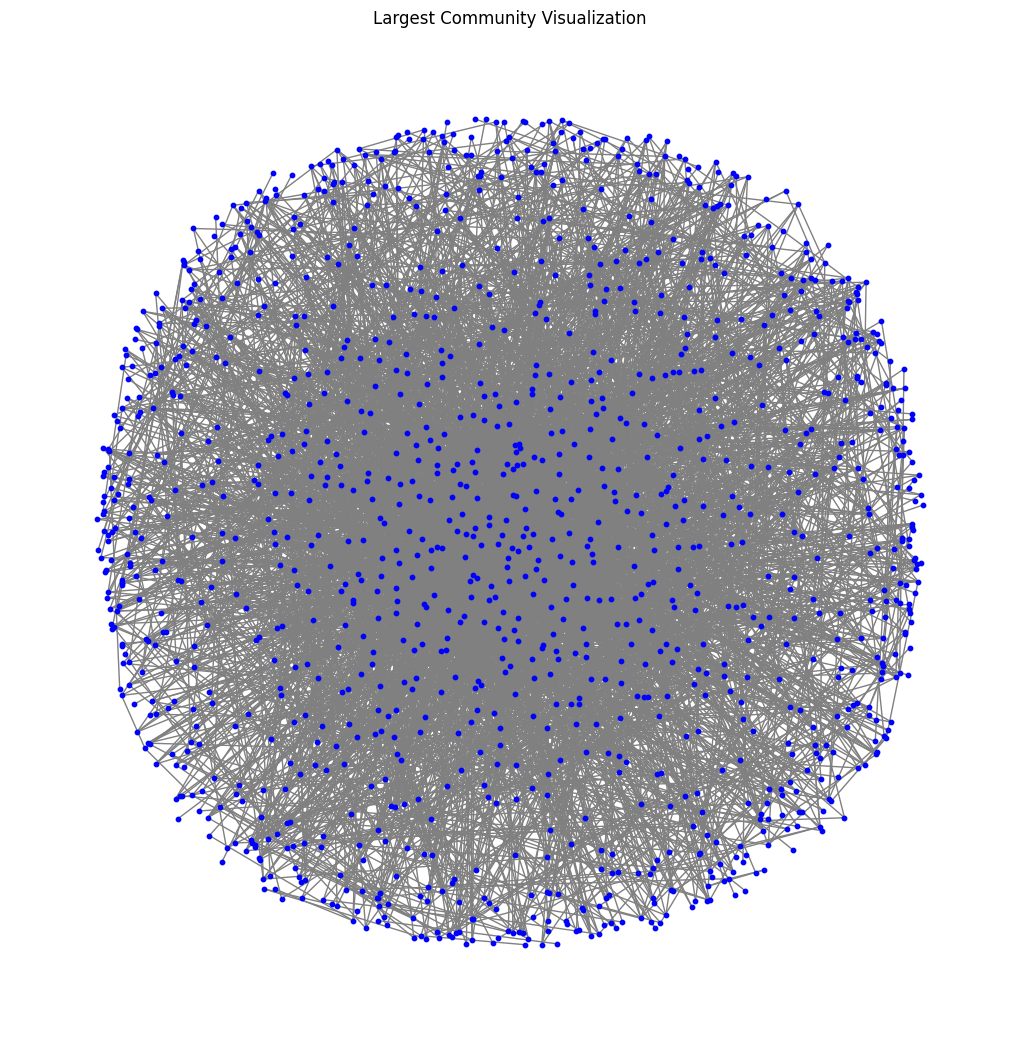

In [ ]:
# get largest community by node count
largest_community = max(communities_l, key=len)

# print details about the largest community
print(f"Size of the largest community: {len(largest_community)}")
print(f"Nodes in the largest community: {largest_community}")

# create a subgraph of the largest community
largest_community_subgraph = G_sampled.subgraph(largest_community)

# plot the largest community
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(largest_community_subgraph, k=0.5, iterations=50)
nx.draw(
    largest_community_subgraph,
    pos,
    node_size=10,
    node_color="blue",
    with_labels=False,
    edge_color="gray"
)
plt.title("Largest Community Visualization")

In [ ]:
# use girvan newman's algorithm
communities_gn = nx_comm.girvan_newman(G_sampled_small)

# extract the first level of communities
node_groups = []
for com in next(communities_gn):
    node_groups.append(list(com))

# print the number of communities and modularity score
print("# of communities: ", len(node_groups), ", modularity score: ", nx_comm.modularity(G_sampled_small, node_groups))

# of communities:  318 , modularity score:  0.8737446833648395


In [ ]:
# extract the second level of communities
second_level_communities = next(communities_gn)  # Get the second partition of communities

# convert the second-level communities into a list of node groups
node_groups_level_2 = [list(com) for com in second_level_communities]

# print the number of communities and modularity score for the second level
print("# of communities (second level): ", len(node_groups_level_2),
      ", modularity score: ", nx_comm.modularity(G_sampled_small, node_groups_level_2))

# of communities (second level):  319 , modularity score:  0.8962517722117203


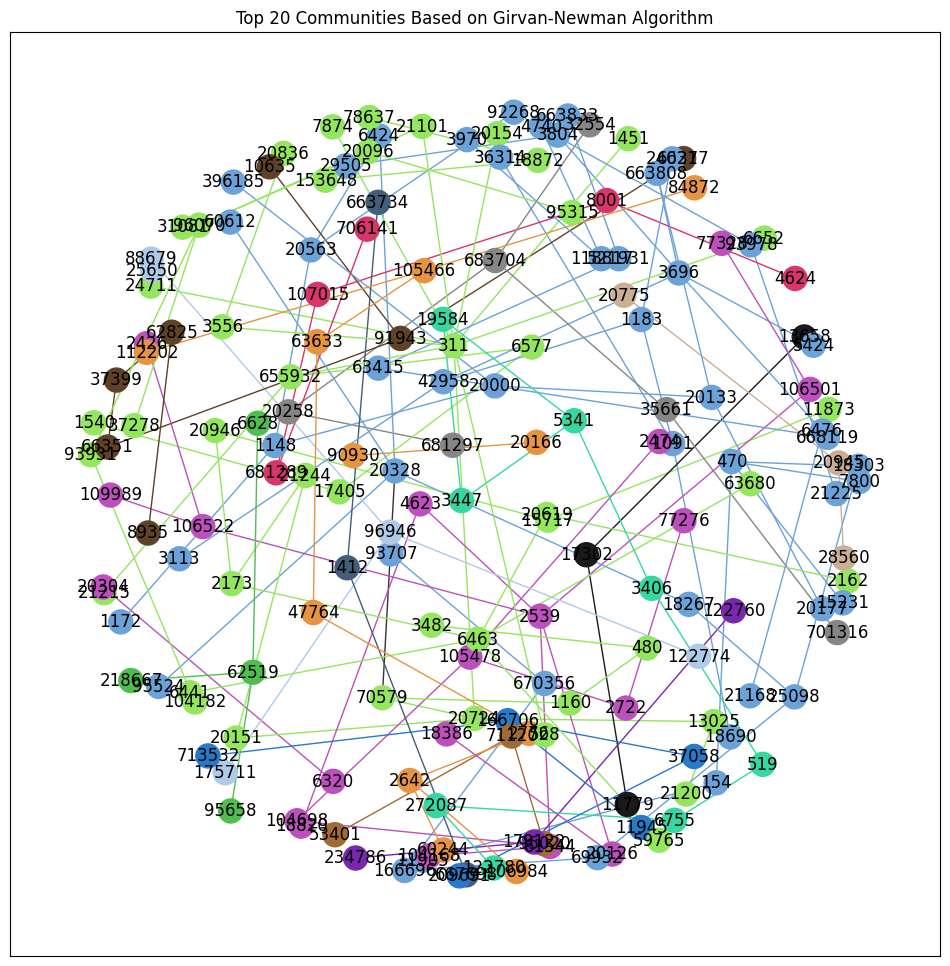

In [ ]:
# get the top 20 largest communities
top_20_communities = sorted(node_groups, key=len, reverse=True)[:20]

# combine the nodes from the 20 communities into a set
top_20_nodes = set(itertools.chain.from_iterable(top_20_communities))

# create subgraph of the top 20 communities
G_top_20 = G_sampled_small.subgraph(top_20_nodes)

# set labels to the nodes and edges
set_node_community(G_top_20, top_20_communities)
set_edge_community(G_top_20)

# add colors to nodes based on community
node_color = [get_color(G_top_20.nodes[v]['community']) for v in G_top_20.nodes]
external = [(v, w) for v, w in G_top_20.edges if G_top_20.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_top_20.edges if G_top_20.edges[v, w]['community'] > 0]
internal_color = [get_color(G_top_20.edges[e]['community']) for e in internal]

# generate positions for visualizing the graph
pos = nx.spring_layout(G_top_20, k=1.0, iterations=100)

# create plot for communities
plt.figure(figsize=(12, 12))

# draw the external and internal nodes
nx.draw_networkx(
    G_top_20, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)

nx.draw_networkx(
    G_top_20, pos=pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

# add title label
plt.title("Top 20 Communities Based on Girvan-Newman Algorithm")
plt.show()
